In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diamonds = pd.read_csv("diamonds_processed.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_encoded,cut_encoded,color_encoded,clarity_encoded,price_transformed
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,6,2,4.796051
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,4,6,3,4.796051
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,2,6,5,4.798129
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,4,2,4,4.812483
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,2,1,2,4.814507


## Linear Regression

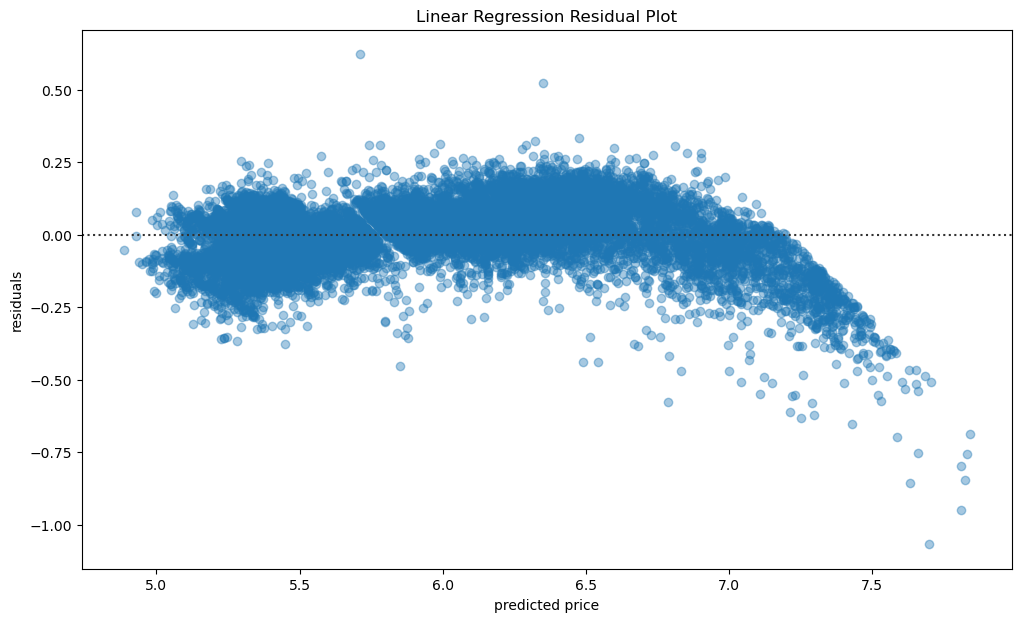


RMSE: 0.1112
R^2: 0.9658


In [4]:
lin_df = diamonds[['depth', 'table', 'x', 'y',
       'z', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded',
        'price_transformed']]

x=lin_df.iloc[:,:-1].values 
y=lin_df.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) #adjusted from previous 80/20 split

regression=LinearRegression()
regression.fit(x_train,y_train)

y_hat = regression.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


#metrics.append({"Model":"Linear_1",
#               "RMSE":rmse,
#               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

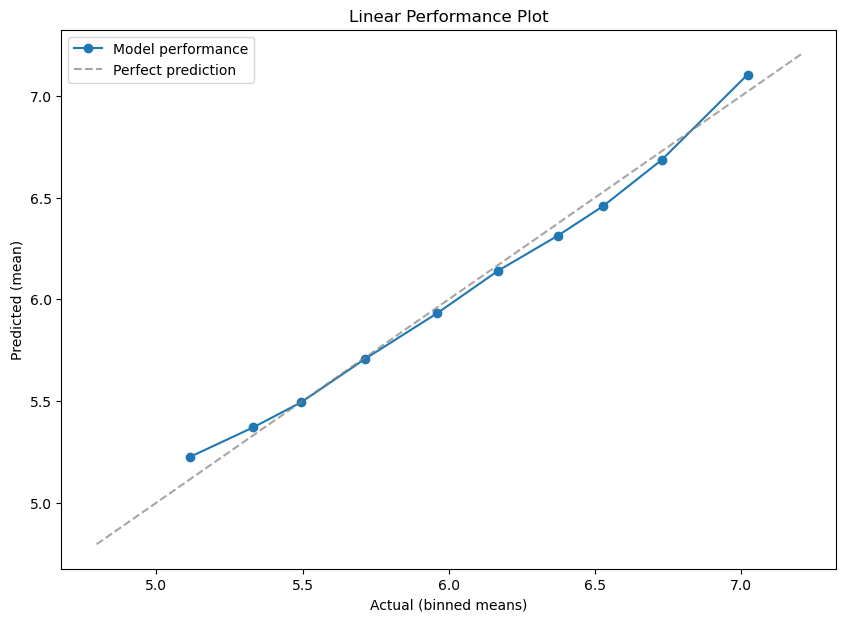

In [5]:
df = pd.DataFrame({'y_true': y_test, 'y_hat': y_hat})
df['bin'] = pd.qcut(df['y_true'], q=10, duplicates='drop') 

bin_means = df.groupby('bin',observed=False).agg({'y_true': 'mean', 'y_hat': 'mean'}).reset_index()

plt.figure(figsize=(10, 7))
plt.plot(bin_means['y_true'], bin_means['y_hat'], marker='o', label='Model performance')
plt.plot([df['y_true'].min(), df['y_true'].max()],
         [df['y_true'].min(), df['y_true'].max()], '--', color='gray', label='Perfect prediction',alpha=0.7)
plt.xlabel('Actual (binned means)')
plt.ylabel('Predicted (mean)')
plt.title('Linear Performance Plot')
plt.legend()

plt.show()

## Random Forest

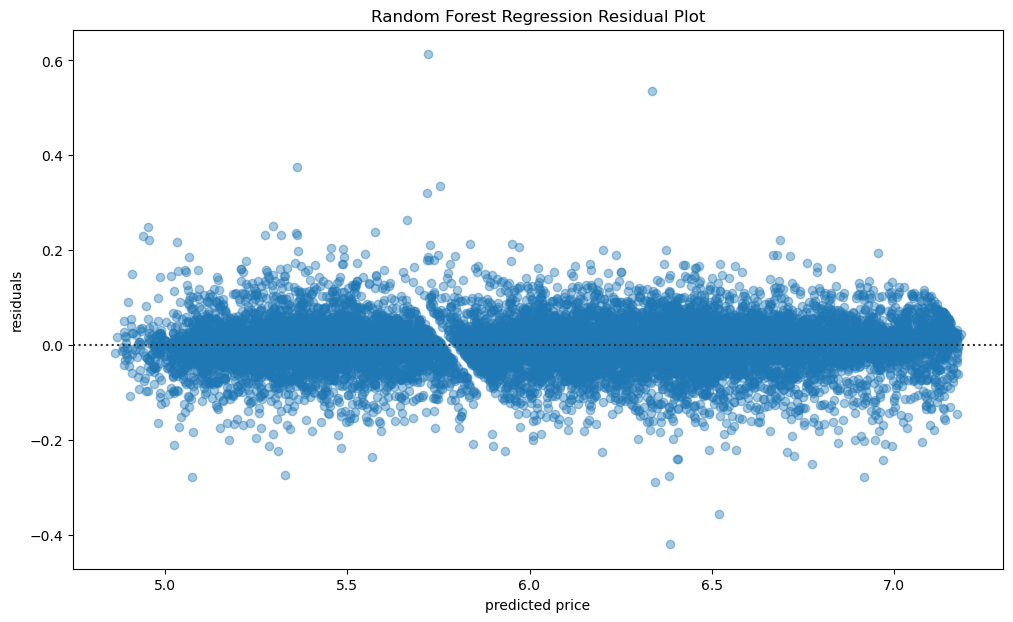


RMSE: 0.0537
R^2: 0.992


In [7]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_hat = rf.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Random Forest Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

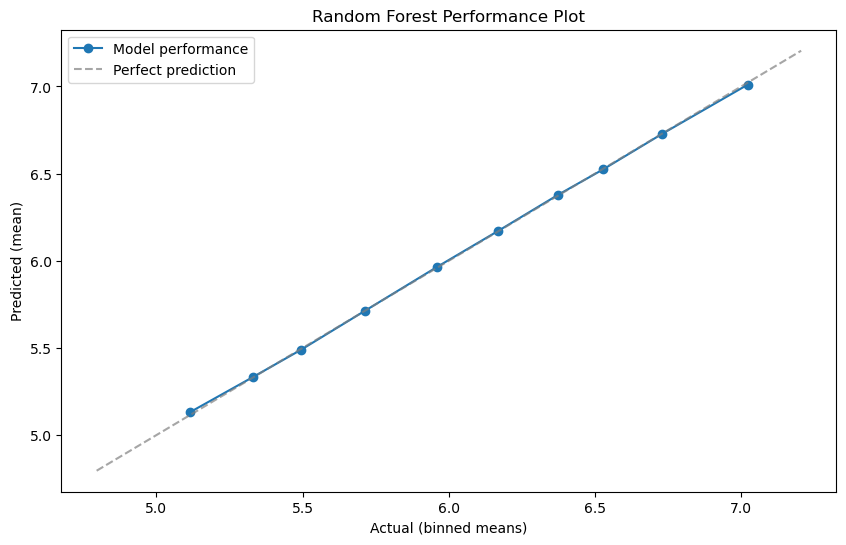

In [8]:
df = pd.DataFrame({'y_true': y_test, 'y_hat': y_hat})
df['bin'] = pd.qcut(df['y_true'], q=10, duplicates='drop') 

bin_means = df.groupby('bin',observed=False).agg({'y_true': 'mean', 'y_hat': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(bin_means['y_true'], bin_means['y_hat'], marker='o', label='Model performance')
plt.plot([df['y_true'].min(), df['y_true'].max()],
         [df['y_true'].min(), df['y_true'].max()], '--', color='gray', label='Perfect prediction',alpha=0.7)
plt.xlabel('Actual (binned means)')
plt.ylabel('Predicted (mean)')
plt.title('Random Forest Performance Plot')
plt.legend()

plt.show()

## Decision Tree

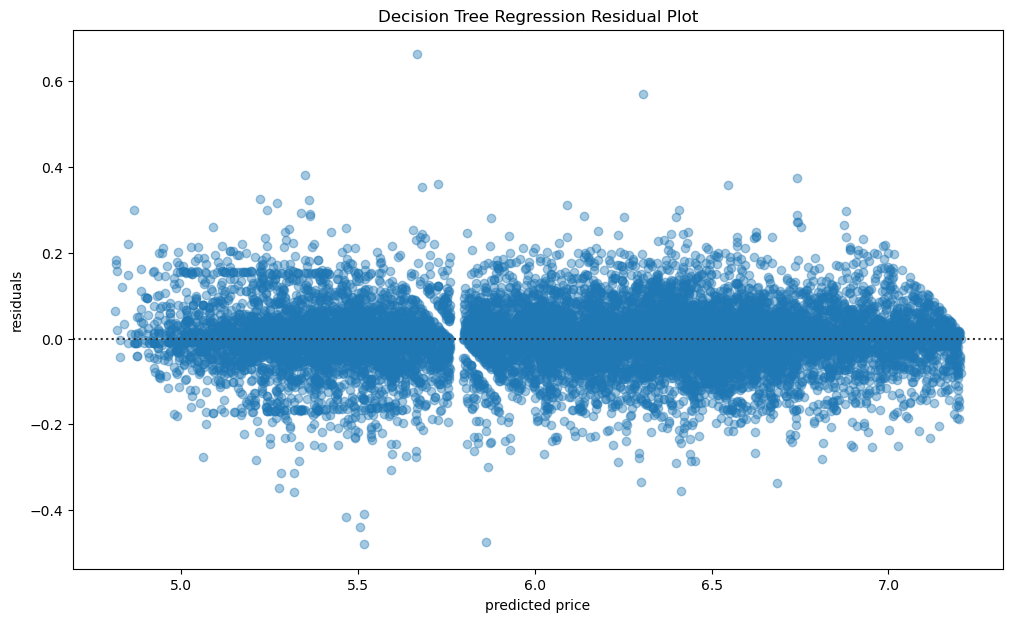


RMSE: 0.0741
R^2: 0.9848


In [10]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)

y_hat = dt.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Decision Tree Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

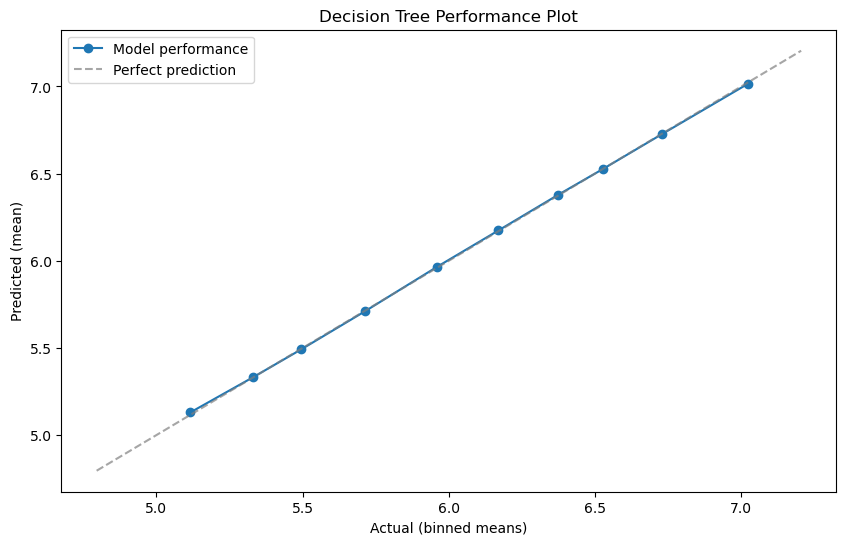

In [11]:
df = pd.DataFrame({'y_true': y_test, 'y_hat': y_hat})
df['bin'] = pd.qcut(df['y_true'], q=10, duplicates='drop') 

bin_means = df.groupby('bin',observed=False).agg({'y_true': 'mean', 'y_hat': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(bin_means['y_true'], bin_means['y_hat'], marker='o', label='Model performance')
plt.plot([df['y_true'].min(), df['y_true'].max()],
         [df['y_true'].min(), df['y_true'].max()], '--', color='gray', label='Perfect prediction',alpha=0.7)
plt.xlabel('Actual (binned means)')
plt.ylabel('Predicted (mean)')
plt.title('Decision Tree Performance Plot')
plt.legend()

plt.show()

## Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

# For example, with a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(r2_score))
print("Cross-validated R^2 scores:", scores)
print("Mean CV R^2:", scores.mean())

Cross-validated R^2 scores: [0.90984726 0.91349903 0.95677528 0.36966532 0.7218578 ]
Mean CV R^2: 0.7743289401801271


In [14]:
model2 = LinearRegression()

scores = cross_val_score(model2, x, y, cv=5, scoring=make_scorer(r2_score))
print("Cross-validated R^2 scores:", scores)
print("Mean CV R^2:", scores.mean())

Cross-validated R^2 scores: [0.91445596 0.89573198 0.95705402 0.69540228 0.91327202]
Mean CV R^2: 0.8751832523951301


In [15]:
model3 = DecisionTreeRegressor()

scores = cross_val_score(model3, x, y, cv=5, scoring=make_scorer(r2_score))
print("Cross-validated R^2 scores:", scores)
print("Mean CV R^2:", scores.mean())

Cross-validated R^2 scores: [ 0.84899802  0.87062847  0.95306671 -0.09700466  0.60974832]
Mean CV R^2: 0.6370873733586024


## Extra: Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

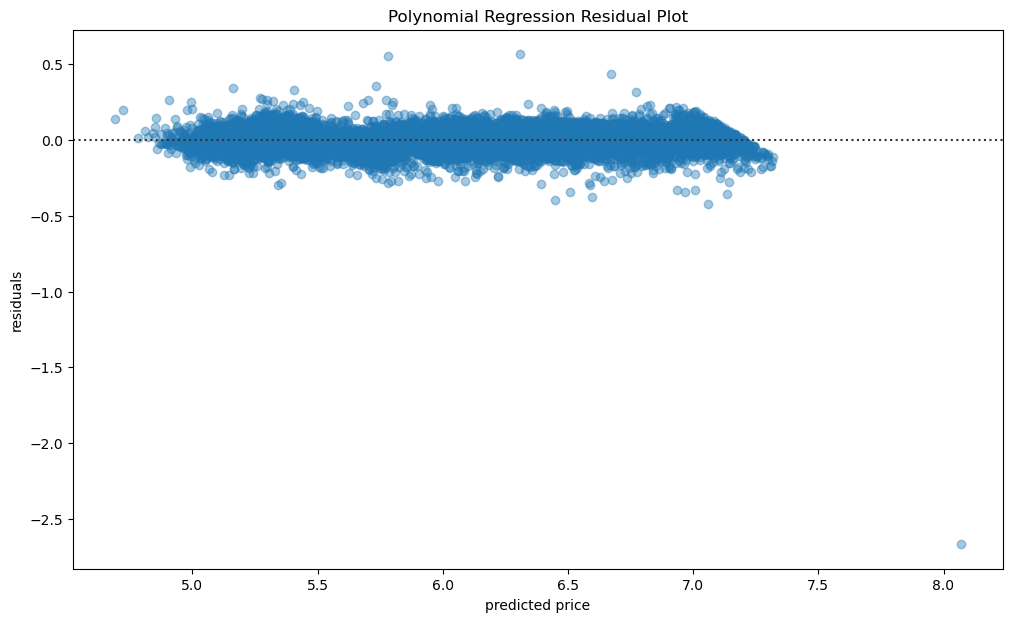


RMSE: 0.0717
R^2: 0.9858


In [18]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(x_train, y_train)

y_hat = poly_model.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Polynomial Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

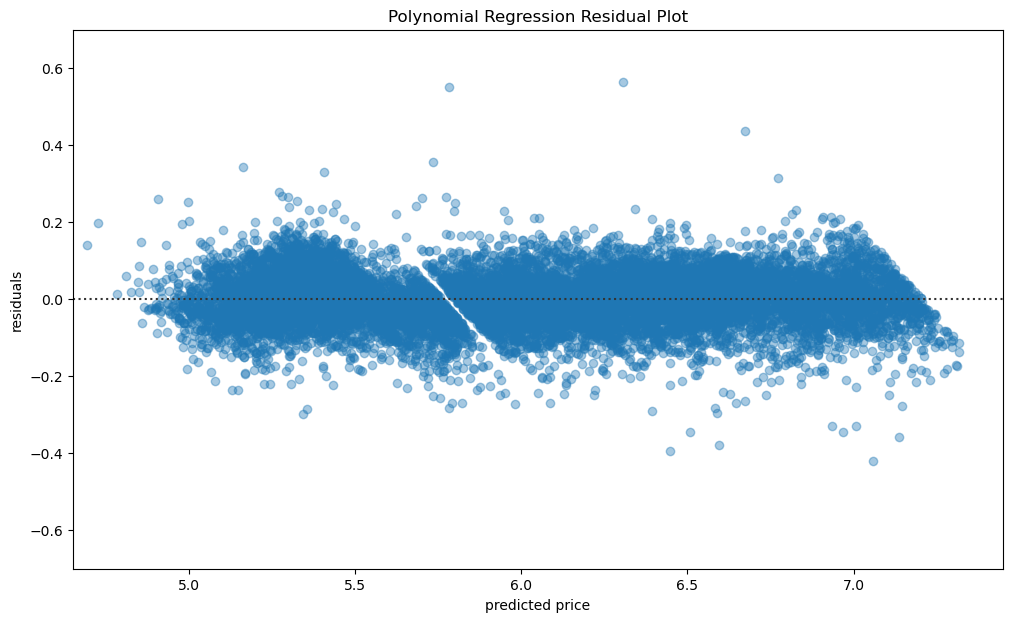

In [49]:
plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.xlim(4.65,7.45)
plt.ylim(-0.7,0.7)
plt.title("Polynomial Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

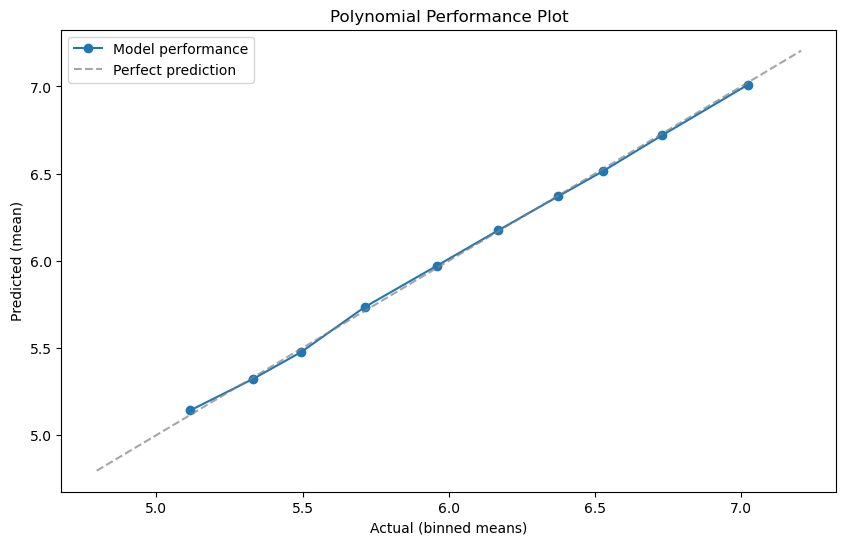

In [20]:
df = pd.DataFrame({'y_true': y_test, 'y_hat': y_hat})
df['bin'] = pd.qcut(df['y_true'], q=10, duplicates='drop') 

bin_means = df.groupby('bin',observed=False).agg({'y_true': 'mean', 'y_hat': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(bin_means['y_true'], bin_means['y_hat'], marker='o', label='Model performance')
plt.plot([df['y_true'].min(), df['y_true'].max()],
         [df['y_true'].min(), df['y_true'].max()], '--', color='gray', label='Perfect prediction',alpha=0.7)
plt.xlabel('Actual (binned means)')
plt.ylabel('Predicted (mean)')
plt.title('Polynomial Performance Plot')
plt.legend()

plt.show()

In [21]:
model3 = poly_model

scores = cross_val_score(model3, x, y, cv=5, scoring=make_scorer(r2_score))
print("Cross-validated R^2 scores:", scores)
print("Mean CV R^2:", scores.mean())

Cross-validated R^2 scores: [0.95896249 0.97057453 0.9898959  0.73947557 0.93428235]
Mean CV R^2: 0.9186381660633982


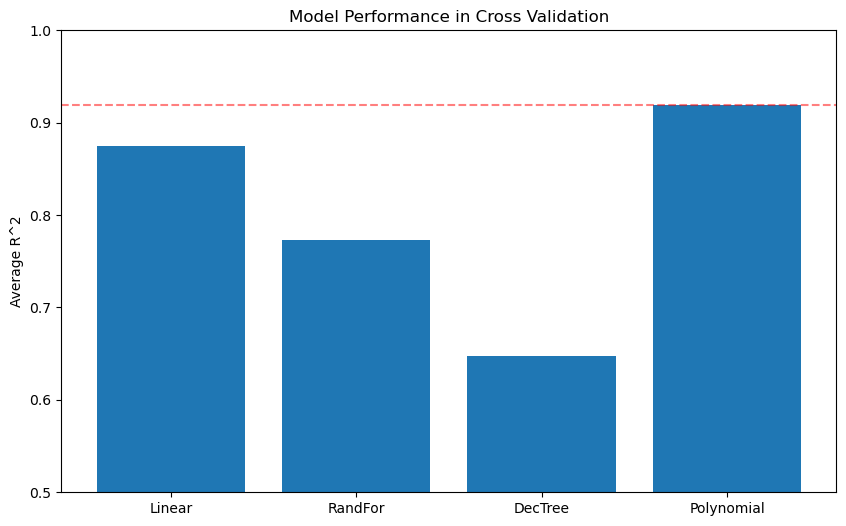

In [22]:
plt.figure(figsize=(10,6))
plt.bar(["Linear","RandFor","DecTree","Polynomial"],height=[0.8751832523951301,0.7732860202817902,0.6474443394469924,0.9186381660633982])
plt.title('Model Performance in Cross Validation')
plt.ylabel('Average R^2')
plt.axhline(0.9186381660633982,linestyle="--",color="red",alpha=0.5)
plt.ylim(0.5,1)
plt.show()